In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 123 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [5]:
M.clear_filters().filter_strs('!test')


# M.filter_jobs(47)
# M.filter_models('ae')
# M.filter_datasets('3dshapes')
# M.filter(lambda r: 'n/adain-dec' in r.config.info.history or 'n/adain-large' in r.config.info.history)
# M.filter_models('wgan')

# M.filter_datasets('box-s1')
# M.filter_datasets('mpi3d')
# M.filter_datasets('3dshapes')

# M.filter_min(ckpt=16)

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date').sort_by('job')
pass
M.show()


  0) 3dshapes-wae_0002-6026518-01_200129-001522
  1) 3dshapes-wae_0002-6026518-02_200129-001602
  2) 3dshapes-ae_0002-6026518-03_200129-001602
  3) 3dshapes-vae_0002-6026518-04_200129-001602
  4) 3dshapes-vae_0002-6026518-05_200129-001620
  5) 3dshapes-fwae_0002-6026518-06_200129-001738
  6) 3dshapes-fwae_0002-6026518-07_200129-001835
  7) 3dshapes-fvae_0002-6026518-08_200129-001754
  8) 3dshapes-fvae_0002-6026518-09_200129-001837
  9) 3dshapes-wgan_0003-6026539-00_200129-002531
 10) 3dshapes-wae_0003-6026539-01_200129-002624
 11) 3dshapes-dae_0012-6032710-00_200129-182006
 12) 3dshapes-dae_0012-6032710-01_200129-181926
 13) 3dshapes-dae_0012-6032710-02_200129-181947
 14) 3dshapes-dae_0012-6032710-03_200129-181951
 15) 3dshapes-dae_0012-6032710-04_200129-181936
 16) 3dshapes-dae_0013-6032717-00_200129-185000
 17) 3dshapes-dae_0013-6032717-01_200129-185001
 18) 3dshapes-dae_0013-6032717-02_200129-185109
 19) 3dshapes-dae_0013-6032717-03_200129-184954
 20) 3dshapes-dae_0013-6032717-04_20

In [6]:
# M.prep_info(100)
M.prep_info()
# M.load_records(tqdm)

Selecting checkpoint: last
celeba-vae_0055-6050351-02_200201-215032 has no checkpoint
celeba-vae_0055-6050351-03_200201-215101 has no checkpoint
celeba-vae_0055-6050351-04_200201-215037 has no checkpoint


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs


In [7]:
M.show('ckpt')

  0) 3dshapes-wae_0002-6026518-01_200129-001522
	Checkpoint: 50 (approx 150000 steps)

  1) 3dshapes-wae_0002-6026518-02_200129-001602
	Checkpoint: 50 (approx 150000 steps)

  2) 3dshapes-ae_0002-6026518-03_200129-001602
	Checkpoint: 50 (approx 150000 steps)

  3) 3dshapes-vae_0002-6026518-04_200129-001602
	Checkpoint: 50 (approx 150000 steps)

  4) 3dshapes-vae_0002-6026518-05_200129-001620
	Checkpoint: 50 (approx 150000 steps)

  5) 3dshapes-fwae_0002-6026518-06_200129-001738
	Checkpoint: 50 (approx 150000 steps)

  6) 3dshapes-fwae_0002-6026518-07_200129-001835
	Checkpoint: 50 (approx 150000 steps)

  7) 3dshapes-fvae_0002-6026518-08_200129-001754
	Checkpoint: 50 (approx 150000 steps)

  8) 3dshapes-fvae_0002-6026518-09_200129-001837
	Checkpoint: 50 (approx 150000 steps)

  9) 3dshapes-wgan_0003-6026539-00_200129-002531
	Checkpoint: 50 (approx 150000 steps)

 10) 3dshapes-wae_0003-6026539-01_200129-002624
	Checkpoint: 50 (approx 150000 steps)

 11) 3dshapes-dae_0012-6032710-00_20012

In [8]:
M.clear_run_cache()

In [9]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python hybrid.py n/t/box-s2 --load {}'.format(n) for n in M.through().name))


In [10]:
run = M[5]
run.name

'box-s1-fwae_0047-6049598-06_200201-051258'

In [11]:
M.clear_run_cache()

In [12]:
S = run.reset()

In [13]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [14]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/box-s1-fwae_0047-6049598-06_200201-051258/checkpoint_26.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/box-s1-fwae_0047-6049598-06_200201-051258/checkpoint_26.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
budget: 600
old2new_ratio: 1
Replaced counts in old: from [-1, 0, 0, 0] to [-1, 0, 0, 0]
Replaced counts in new: from [0, 600, 0, 0] to [0, 600, 0, 0]
Creating old (type=dataset/byfactor)
  factor: shape
  vals: None (by default)
  counts: [-1, 0, 0, 0]
  seeds: None (by default)
  det: True (by default)
  labeled: False (by default)
  dataroot: /is/ei/fleeb/workspace/local_data (in parent)
  load_memory: True (by default)
  train: True (in parent)
  labeled: True
  noise: None (by default)
  din: (3, 64, 64) (by default)
  dout: 6 (by default)
Filtering out 287906/384000 samples
Creating new (type=dataset/byfactor)
  factor: shape
  vals: None (by default)
  counts: [0, 600, 0, 0]
  seeds: None (by 

In [15]:
run.run(pbar=tqdm)

/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Using 120 samples



Storing 120 latent vectors


In [16]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/box-s1-fwae_0047-6049598-06_200201-051258/checkpoint_26.pth.tar'

In [17]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


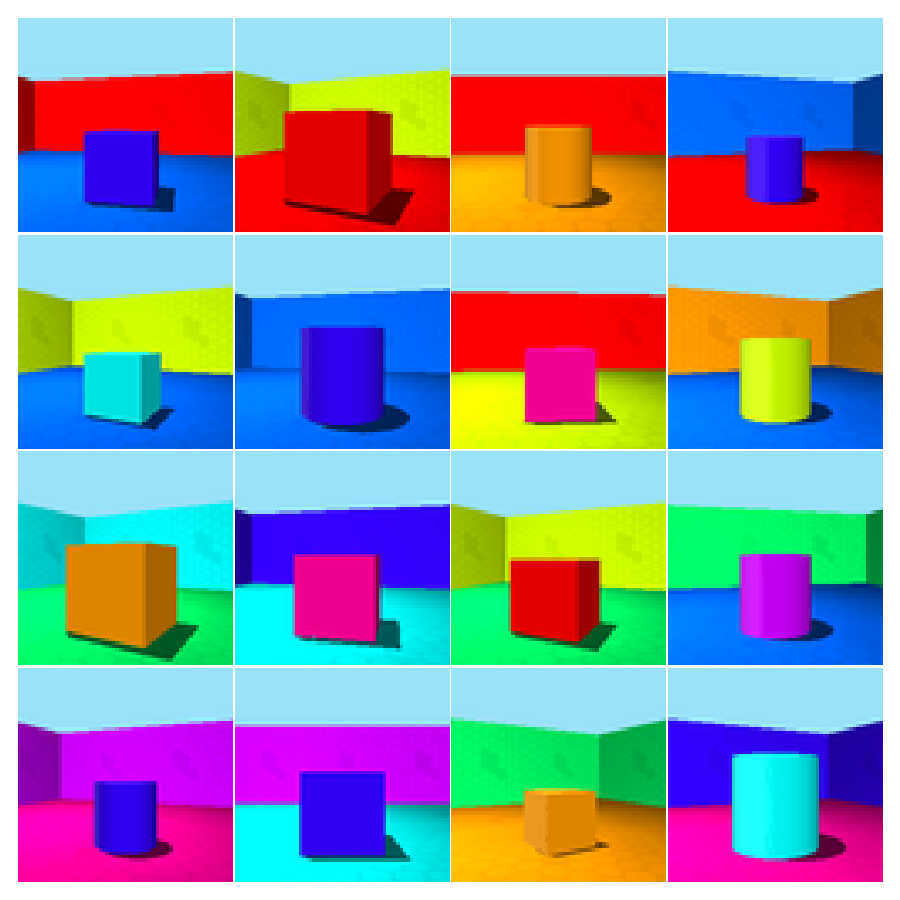

In [18]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


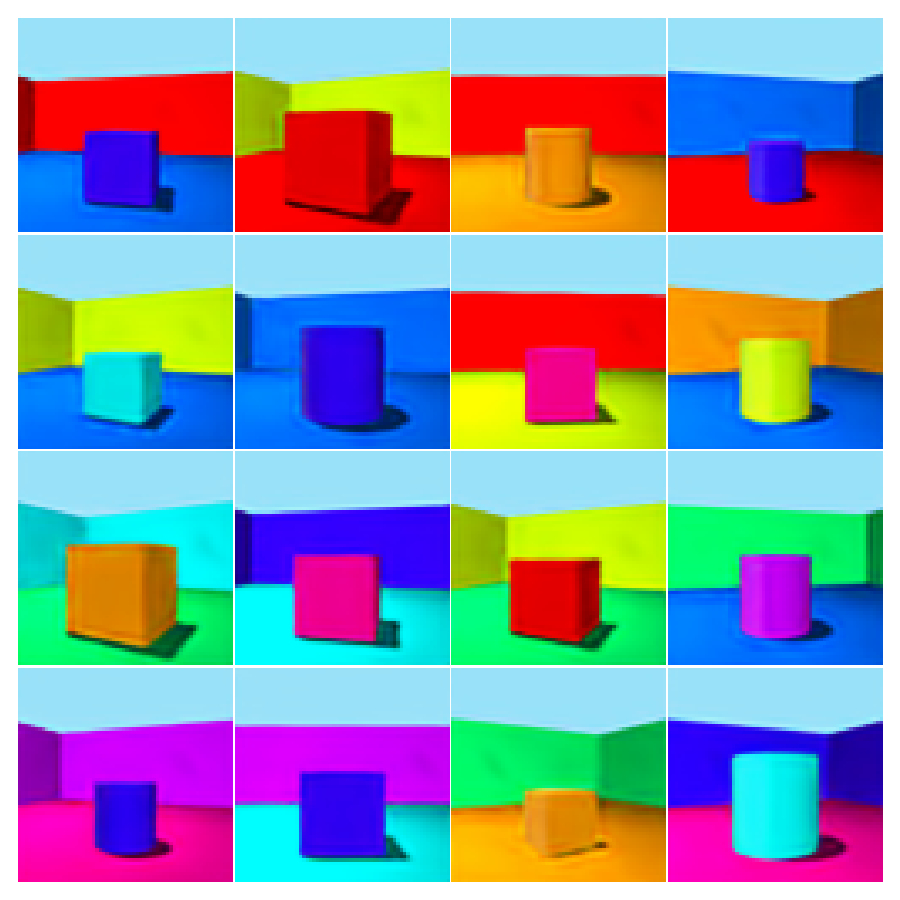

In [19]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


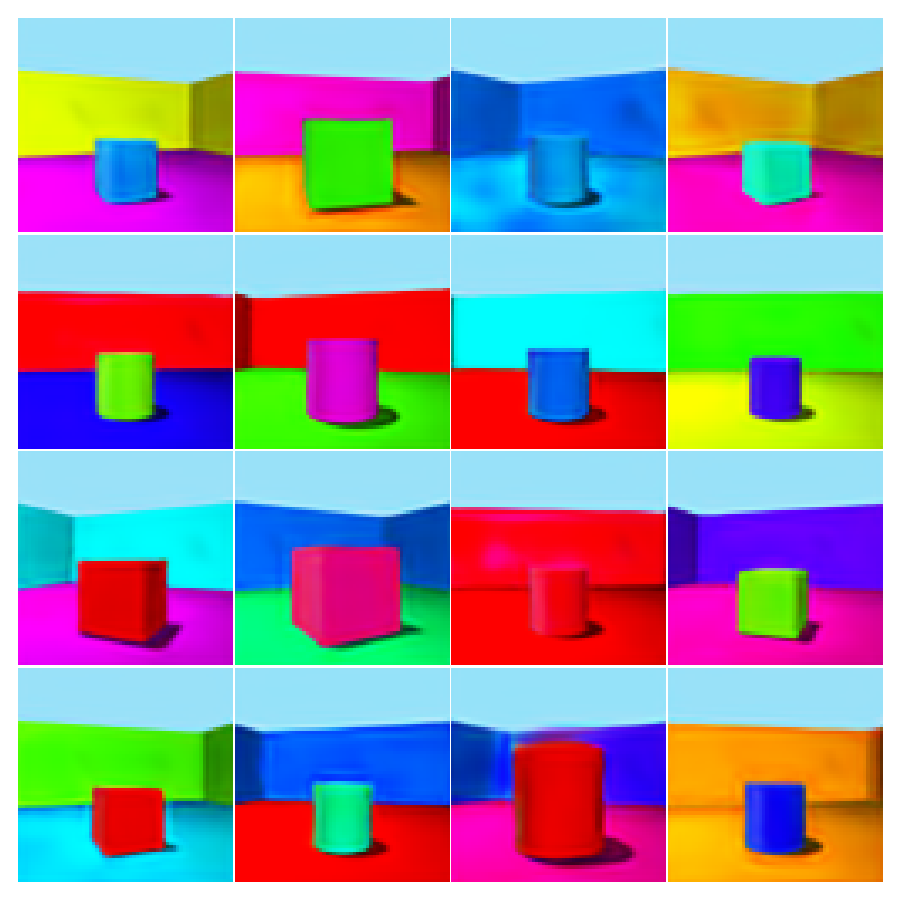

In [20]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


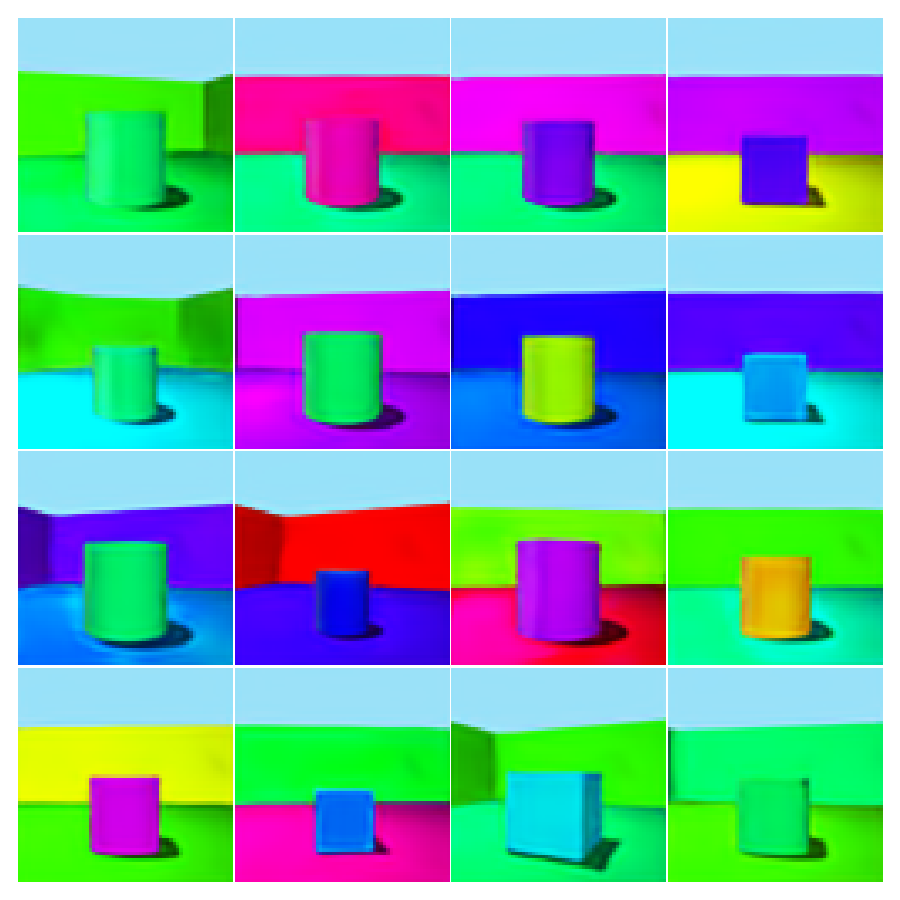

In [21]:
viz['gens'][0].view(scale=2)

In [22]:
viz['traversals'][2].view(scale=2)

<IPython.core.display.Javascript object>


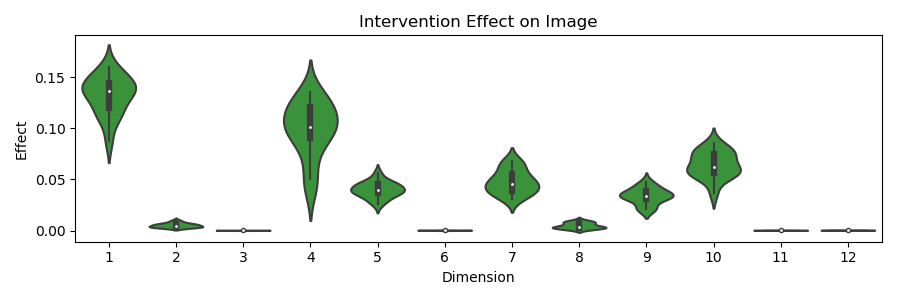

In [23]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


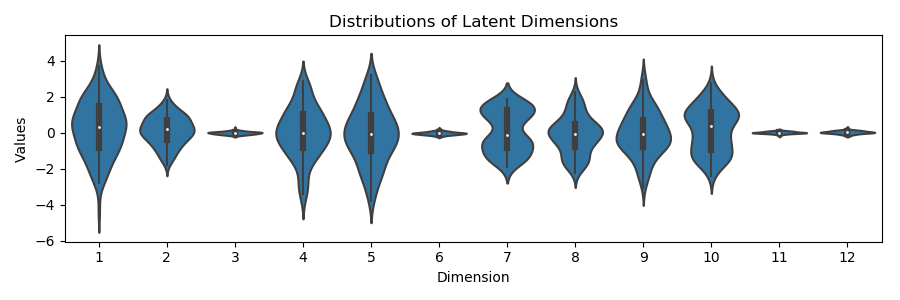

In [24]:
fig = viz['latent'][0].view(scale=2)
# # plt.figure(fig.number)
# # ax = fig.get_axes()[0]
# # ax.set_ylim(-3, 3)
fig

In [25]:
# evals = run.evaluate(pbar=tqdm)

In [26]:
# update_checkpoint(S, 'evals', overwrite=True)

In [27]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [28]:
run.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-ae_0007-6027503-02_200129-124609/checkpoint_20.pth.tar'

In [29]:
run.meta.history

['n/wae',
 'n/adain-dec',
 'n/3dshapes',
 'n/basics',
 'n/double',
 'n/basics',
 'base']

In [47]:
print(run.state.model)

Wasserstein_PP(
  (enc): Double_Encoder(
    (layers): ModuleList(
      (0): DoubleConvLayer(
        residual=False
        (conv): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
        (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (out_nonlin): ELU(alpha=1.0, inplace=True)
      )
      (1): DoubleConvLayer(
        residual=False
        (conv): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
        (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=Fals

In [31]:
# S.keys()

In [32]:
# S.hello = 'world'

In [33]:
# update_checkpoint(S, 'hello')

In [34]:
# viz_

In [35]:
# S.fid_gen_stats.keys()

In [36]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [37]:
# import pickle

In [38]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [39]:
# f

In [40]:
# run.state.keys()

In [41]:
# model = run.state.model

In [42]:
# q = run.state.q
# q.shape

In [43]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [44]:
# show_nums(imgs)

In [45]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/viewing/'
run.save(media_root)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-ae_0007-6027503-02_200129-124609_ckpt20
	Model saved
	Config saved
	Visualization saved
	Evaluation saved
	Results saved: val_Q


'/is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-ae_0007-6027503-02_200129-124609_ckpt20'